In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Reading Data

In [3]:
df = pd.read_csv("/kaggle/input/student-dataset/student_dataset.csv")

# take a look at the dataset
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [4]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


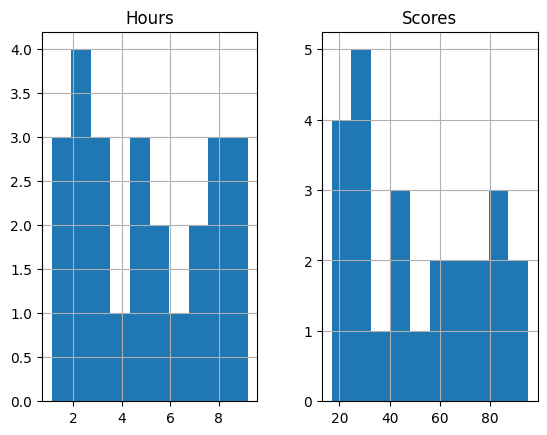

In [5]:
df.hist()
plt.show()

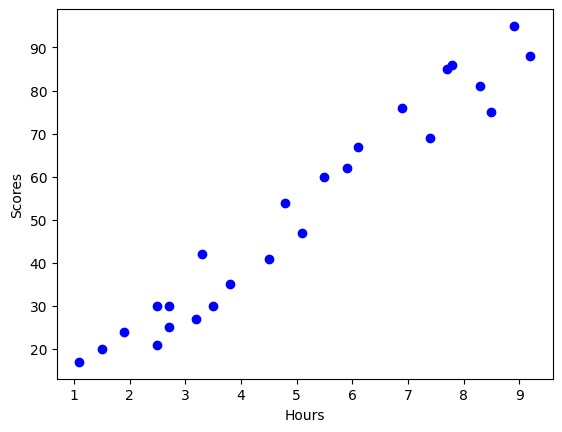

In [7]:
# Plotting the distribution of scores
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Creating train and test dataset

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [15]:
print(train)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
17    1.9      24
18    6.1      67
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [16]:
print(test)

    Hours  Scores
6     9.2      88
7     5.5      60
15    8.9      95
16    2.5      30
19    7.4      69


In [10]:
print(len(df))
print(len(train))
print(len(test))


20
5
25



# Simple Regression Model

In [17]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])

regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.92893896]]
Intercept:  [1.67617016]


Text(0, 0.5, 'Scores')

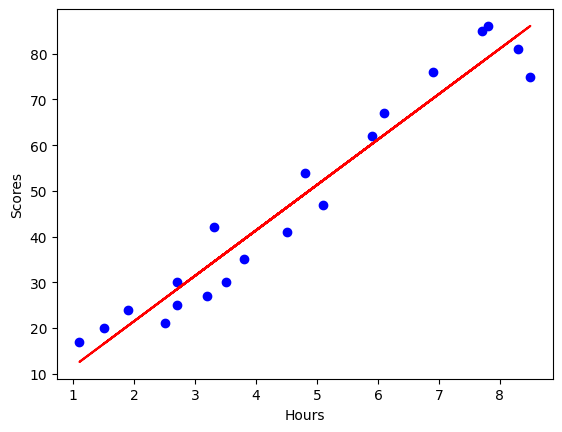

In [21]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)


In [29]:
print(test_x)
y_pred = regr.predict(test_x) # Predicting the score

[[9.2]
 [5.5]
 [8.9]
 [2.5]
 [7.4]]


# Evaluating the model

In [19]:

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 4.67
Residual sum of squares (MSE): 22.73
R2-score: 0.96


# Making Predictions

In [39]:
 # Comparing Actual vs Predicted 
    
#`ravel()` function, you ensure that both `y_test` and `y_pred` are 1-dimensional arrays before creating the DataFrame.

y_test = y_test.ravel()
y_pred = y_pred.ravel()

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,93.022409
1,27,56.285334
2,69,90.043727
3,30,26.498518
4,62,75.150318


In [37]:
# You can also test with your own data
hours =9.25
own_pred = regr.predict(np.array([9.25]).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.51885556]
